<a href="https://colab.research.google.com/github/KanizAny25/Heart/blob/main/Heart_Disease_Analysis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Analysis**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#Importing all the libraries that we need.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
import pandas as pd

In [ ]:
#importing our dataset.
train=pd.read_csv("gdrive/My Drive/CoLab_Heart disease/heart.csv")

In [ ]:
#checking ten rows by calling 
train.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
def bar_chart(feature):
  survived_train[train['Survived']--0][feature].value_counts()
  df=pd.DataFrame([survived,dead])
  df.index-['Survived','Desd']
  df.plot(kind='bar', stacked = True , figsize=(10,5))

In [ ]:
train.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
#take a look at the colmun names. 
train.columns.values 

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

Columns description

1.age

2.sex

3.chest pain type (4 values)

4.resting blood pressure

5.serum cholestoral in mg/dl

6.fasting blood sugar > 120 mg/dl

7.resting electrocardiographic results (values 0,1,2)

8.maximum heart rate achieved

9.exercise induced angina

10.oldpeak = ST depression induced by exercise relative to rest

11.the slope of the peak exercise ST segment

12.number of major vessels (0-3) colored by flourosopy

13.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

14.The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [ ]:
#checking for null values
train.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#concise summary of our dataset. df.info() 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Let's get a quick overview of the full dataset.**

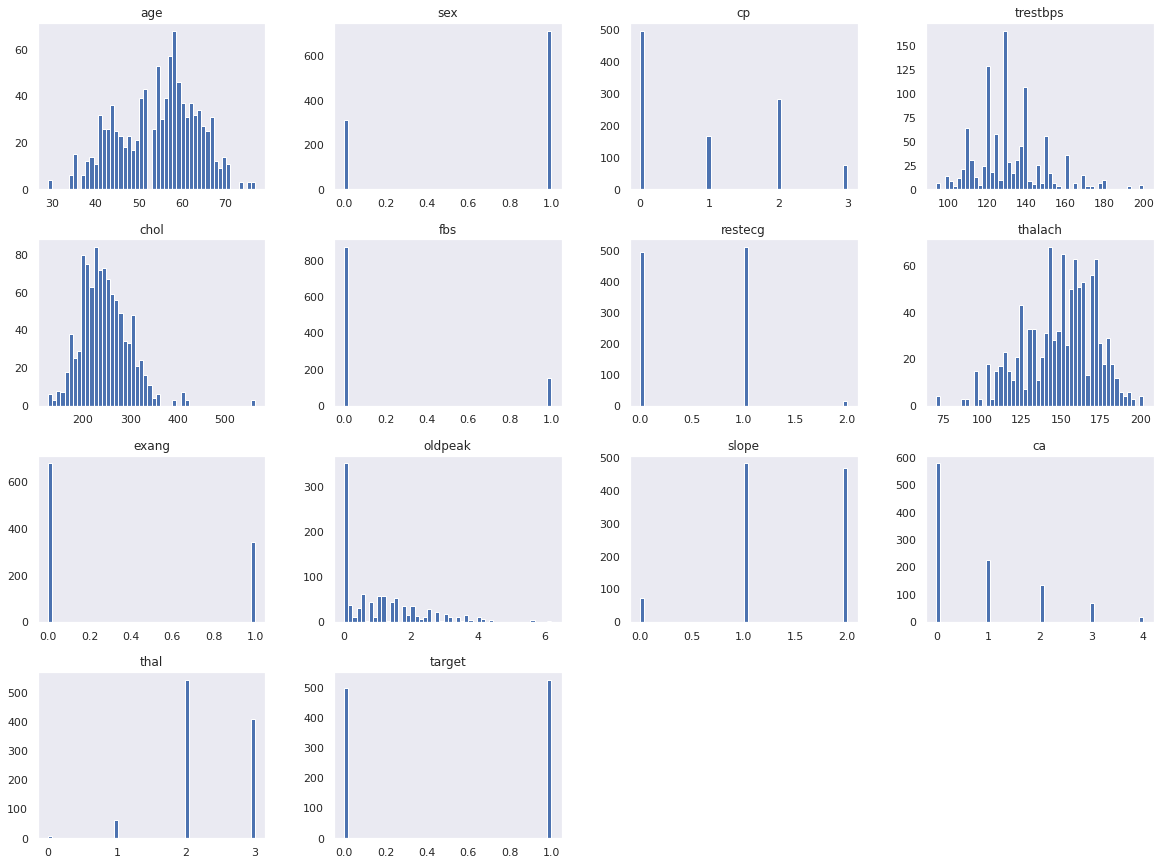

In [ ]:
#plotting histogram of all numeric values
train.hist(bins = 50, grid = False, figsize=(20,15));


Data analysis is about answering questions. Let's define some question as a list.



In [ ]:
questions = ["1. How many people have heart disease and how many people doesn't have heart disease? ",
             "2. People of which sex has most heart disease?", 
             "3. People of which sex has which type of chest pain most?",
             "4. People with which chest pain are most pron to have heart disease?",
             "5. Age vs Maximum heart rate when people have heart disease.",
             "6. Age vs Maximum heart rate when people doesn't have heart disease.",
             "7. Age vs serum cholestoral when people have heart disease.", "8 Age vs serum cholestoral when people doesn't have heart disease.",
             "9. People of which sex has more exercise induced angina?",
             "10. Which sex of people has more fasting blood sugar > 120 mg/dl?" ] 

In [ ]:
questions

["1. How many people have heart disease and how many people doesn't have heart disease? ",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. People with which chest pain are most pron to have heart disease?',
 '5. Age vs Maximum heart rate when people have heart disease.',
 "6. Age vs Maximum heart rate when people doesn't have heart disease.",
 '7. Age vs serum cholestoral when people have heart disease.',
 "8 Age vs serum cholestoral when people doesn't have heart disease.",
 '9. People of which sex has more exercise induced angina?',
 '10. Which sex of people has more fasting blood sugar > 120 mg/dl?']

In [ ]:
#getting the values 
train.target.value_counts()

1    526
0    499
Name: target, dtype: int64

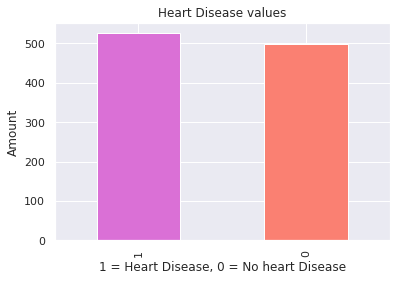

In [ ]:
#plotting bar chart.
train.target.value_counts().plot(kind = 'bar', color= ["orchid", "salmon"]) 
plt.title("Heart Disease values")
plt.xlabel("1 = Heart Disease, 0 = No heart Disease") 
plt.ylabel("Amount"); 
 

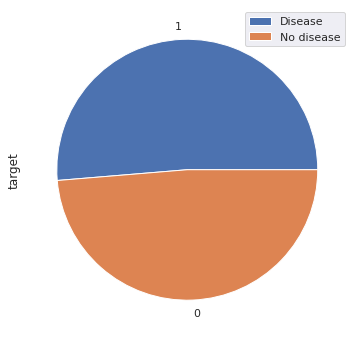

In [ ]:
#plotting a pie chart 
train.target.value_counts().plot(kind = 'pie', figsize = (8, 6))
plt.legend(["Disease", "No disease"]);

0 represent Female

1 represent Male

0 represent No disease

1 represent Disease

Now let's check how many Male and Female are in the dataset



In [ ]:
train.sex.value_counts() 

1    713
0    312
Name: sex, dtype: int64

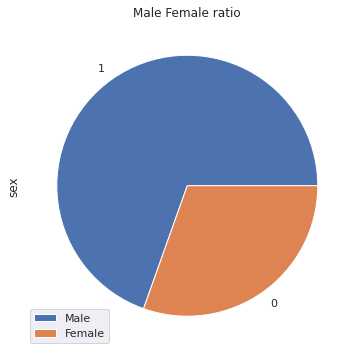

In [ ]:
#plotting a pie chart 
train.sex.value_counts().plot(kind = 'pie', figsize = (8, 6)) 
plt.title('Male Female ratio')
plt.legend(['Male', 'Female']); 


Let's find the answer of our 2nd question.

People of which sex has most heart disease?

In [ ]:
pd.crosstab(train.target, train.sex) 


sex,0,1
target,,
0,86,413
1,226,300


Text(0.5, 0, '0 = No heart Disease, 1 = Heart Disease')

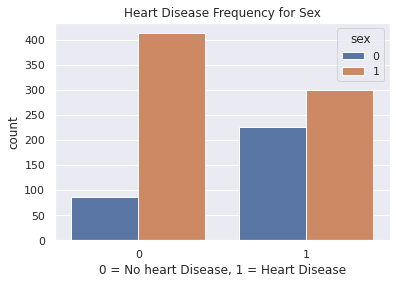

In [ ]:
sns.countplot(x = 'target', data = train, hue = 'sex')
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No heart Disease, 1 = Heart Disease")

Number of male is more than double in our dataset than female.

More than 45% male has heart disease and 75% female has heart disease.

Let's move to question 3

People of which sex has which type of chest pain most?



In [ ]:
#counting values for different chest pain 
train.cp.value_counts() 


0    497
2    284
1    167
3     77
Name: cp, dtype: int64

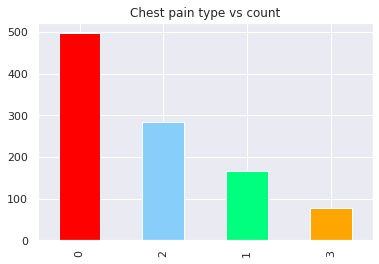

In [ ]:
#plotting a bar chart
train.cp.value_counts().plot(kind = 'bar', color = ['red', 'lightskyblue', 'springgreen', 'orange'])
plt.title('Chest pain type vs count');

Let's see people of which sex has which type of chest pain as a dataframe and then plot them as a bar chart.

In [ ]:
pd.crosstab (train.sex, train.cp)

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


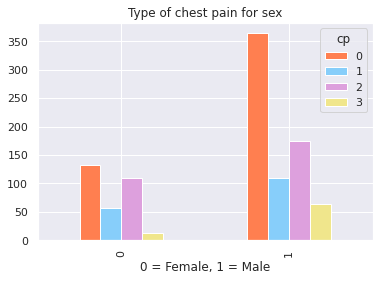

In [ ]:
pd.crosstab(train.sex, train.cp).plot(kind = 'bar', color = ['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title('Type of chest pain for sex')
plt.xlabel('0 = Female, 1 = Male'); 

Most of male has type 0 chest pain and least of Male has type 4 pain.

in case of Female type 0 and type 1 percentage is almost same.

Now question 4!

People with which chest pain are most pron to have heart disease?

In [ ]:
pd.crosstab(train.cp, train.target) 

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


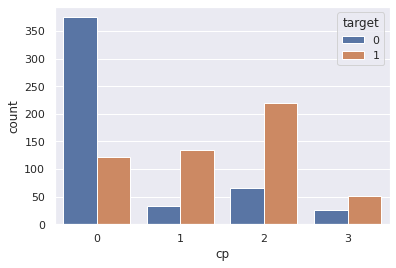

In [ ]:
sns.countplot(x = 'cp', data = train, hue = 'target');

Most of people who has type 0 chest pain has less chance of heart disease.

And we see the opposite for other types.

Now let's take look at our age column.

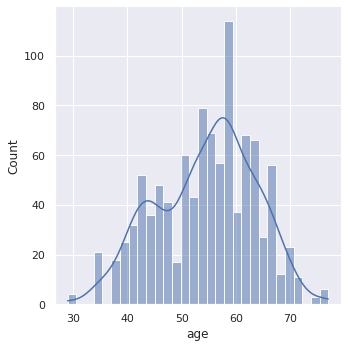

In [ ]:
#create a distribution plot with normal distribution curve
sns.displot( x = 'age', data = train, bins = 30, kde = True); 

From this plot we get a clear overview about Maximum heart rate represented by thalach

Now let's solve question 5 and 6 together.

Age vs Maximum heart rate when people have heart disease.

Age vs Maximum heart rate when people doesn't have heart disease.

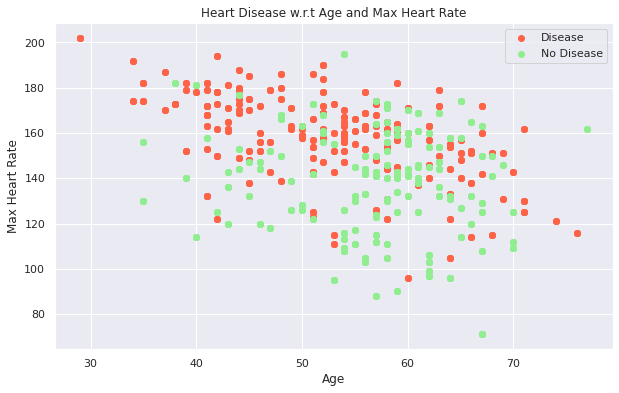

In [ ]:
# Creating a figure
plt.figure(figsize=(10,6))
#plotting the values for people who have heart disease
plt.scatter(train.age[train.target==1], train.thalach[train.target==1], c="tomato")# color
#plotting the values for people who doesn't have heart disease
plt.scatter(train.age[train.target==0], train.thalach[train.target==0], c="lightgreen")# color
# Addind info 
plt.title("Heart Disease w.r.t Age and Max Heart Rate")
plt.xlabel("Age") 
plt.legend(["Disease", "No Disease"]) 
plt.ylabel("Max Heart Rate"); 

Let's make a density curve for visualizing the distribution of age and thalach observations in our dataset.



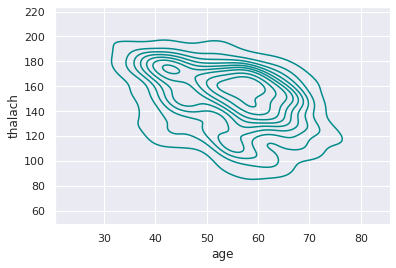

In [ ]:
sns.kdeplot(x = 'age', y = 'thalach', data = train, color = 'darkcyan');

Distribution plot for number of people with heart disease vs max heart rate.

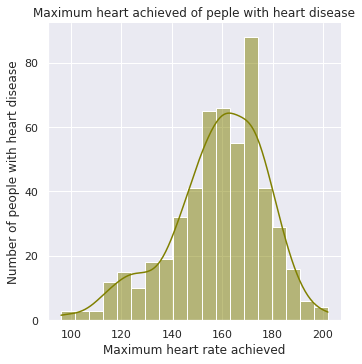

In [ ]:
sns.displot(x = train.thalach[train.target==1], data = train, kde = True, color= 'olive') 
plt.title("Maximum heart achieved of peple with heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people with heart disease"); 


Distribution plot for number of people without heart disease vs max heart rate.

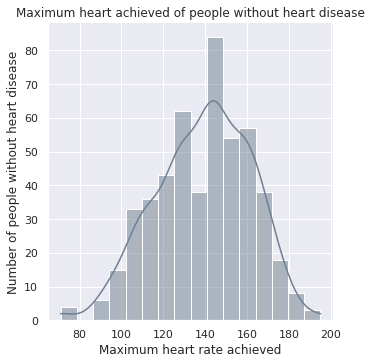

In [ ]:
sns.displot(x = train.thalach[train.target==0], data = train, kde = True, color= 'slategray')
plt.title("Maximum heart achieved of people without heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people without heart disease"); 


Let's first make a distribution plot for serum cholestoral

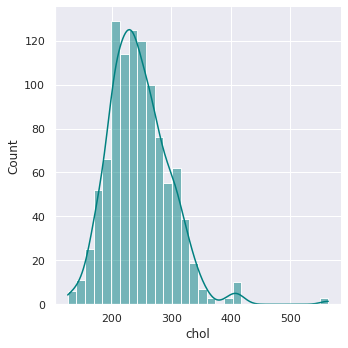

In [ ]:
sns.displot(x = 'chol', data = train, bins = 30, kde = True, color = 'teal'); 

Now let's plot another scatter plot for Age vs serum cholestoral

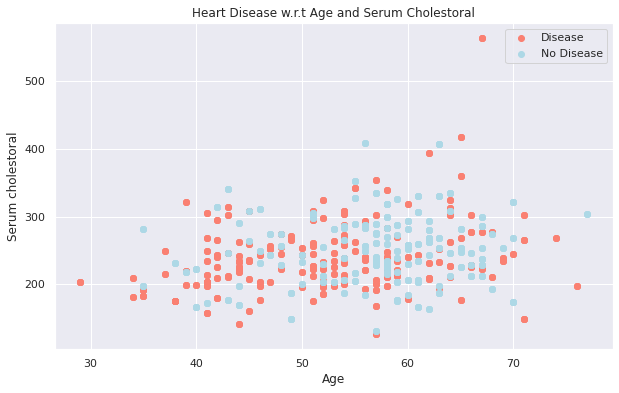

In [ ]:
# Creating another figure 
plt.figure(figsize=(10,6))
#plotting the values for people who have heart disease
plt.scatter(train.age[train.target==1], train.chol[train.target==1], c="salmon") 
# define it as a scatter figure 
#plotting the values for people who doesn't have heart disease
plt.scatter(train.age[train.target==0],train.chol[train.target==0], c="lightblue")
# axis always come as (x, y)
# Add some helpful info
plt.title("Heart Disease w.r.t Age and Serum Cholestoral")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Serum cholestoral"); 

Let's make a density curve for visualizing the distribution of age and chol observations in our dataset.


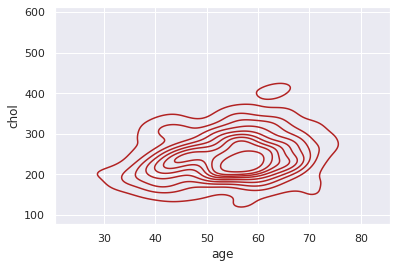

In [ ]:
sns.kdeplot(x = 'age', y = 'chol', data = train, color = 'firebrick'); 

Distribution plot for number of people with heart disease vs Serum Cholestoral


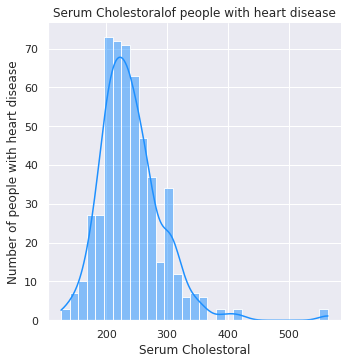

In [ ]:
sns.displot(x = train.chol[train.target==1], data = train, kde = True, color= 'dodgerblue')
plt.title("Serum Cholestoralof people with heart disease")
plt.xlabel("Serum Cholestoral")
plt.ylabel("Number of people with heart disease"); 

Distribution plot for number of people without heart disease vs Serum Cholestoral


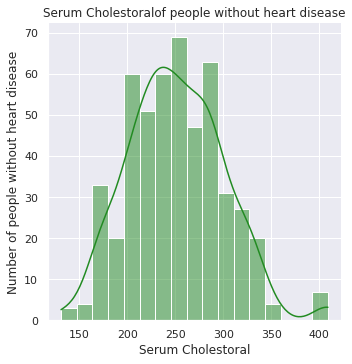

In [ ]:
sns.displot(x = train.chol[train.target==0], data = train, kde = True, color= 'forestgreen')
plt.title("Serum Cholestoralof people without heart disease")
plt.xlabel("Serum Cholestoral")
plt.ylabel("Number of people without heart disease");

Question no: 9

People of which sex has more exercise induced angina?

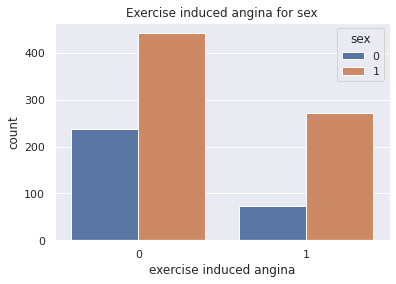

In [ ]:
sns.countplot(x = 'exang', data = train, hue = 'sex')
plt.title('Exercise induced angina for sex')
plt.xlabel('exercise induced angina');


So it is clear that Male has exercise induced angina more than Female

Question 10

Which sex of people has more fasting blood sugar > 120 mg/dl?

In [ ]:
train.fbs.value_counts()

0    872
1    153
Name: fbs, dtype: int64

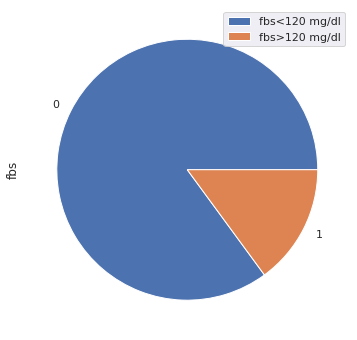

In [ ]:
train.fbs.value_counts().plot(kind = 'pie', figsize = (8, 6))
plt.legend(['fbs<120 mg/dl', 'fbs>120 mg/dl']); 


In [ ]:
pd.crosstab(train.sex, train.fbs) 

fbs,0,1
sex,,
0,270,42
1,602,111


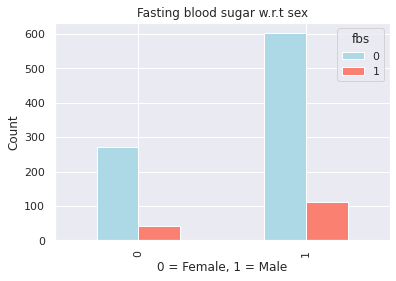

In [ ]:
pd.crosstab(train.sex, train.fbs).plot(kind = 'bar', color = ['lightblue', 'salmon'])
plt.title("Fasting blood sugar w.r.t sex")
plt.xlabel("0 = Female, 1 = Male")
plt.ylabel("Count");



Male has more fbs > 120 ml/dl than Female